In [ ]:
!pip install yfinance
import yfinance as yf


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=3b9417a86e7de3d1d7b5461b2625031af7103dae760a1bd506b63375fb7e8cea
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import pandas as pd


In [ ]:
data = yf.download("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,210.625656,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,211.878738,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,211.710403,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,212.467834,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,211.766541,46939700


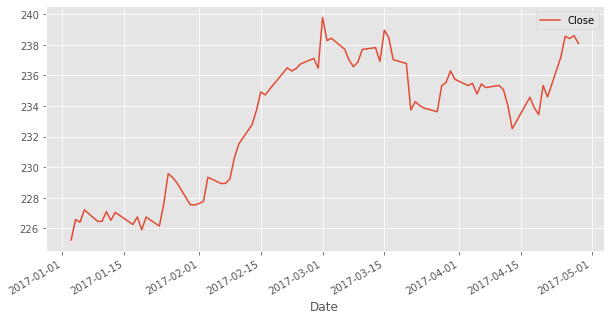

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Read the data
data.index = pd.to_datetime(data.index, dayfirst=True)

# Visualise the data
plt.figure(figsize=(10,5))
data['Close'].plot(figsize=(10,5))
plt.legend()
plt.show()

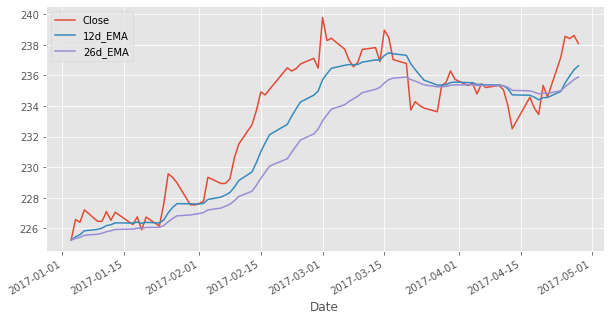

In [ ]:
data['12d_EMA'] = data.Close.ewm(span=12, adjust=False).mean()
data['26d_EMA'] = data.Close.ewm(span=26, adjust=False).mean()

data[['Close','12d_EMA','26d_EMA']].plot(figsize=(10,5))
plt.show()


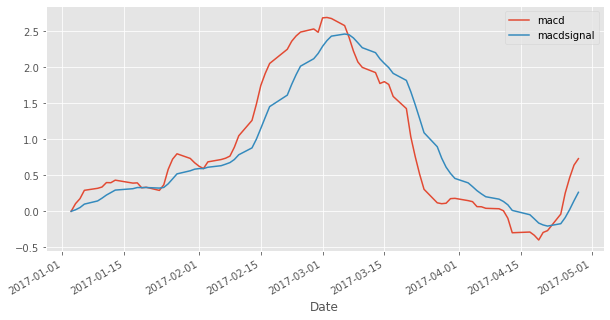

In [ ]:
data['macd'] = data['12d_EMA']- data['26d_EMA'] 

# Calculate Signal
data['macdsignal'] = data.macd.ewm(span=9, adjust=False).mean()

data[['macd','macdsignal']].plot(figsize=(10,5))
plt.show()



In [ ]:
# Import numpy
import numpy as np

# Define Signal
data['trading_signal'] = np.where(data['macd'] > data['macdsignal'], 1, -1)

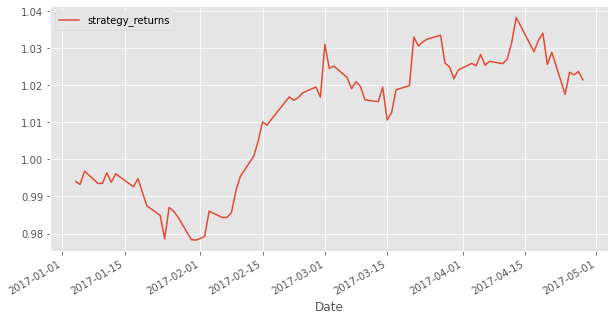

In [ ]:
# Calculate Returns
data['returns'] = data.Close.pct_change()

# Calculate Strategy Returns
data['strategy_returns'] = data.returns * data.trading_signal.shift(1)

# Calculate Cumulative Returns
cumulative_strategy_returns = (data.strategy_returns + 1).cumprod()

# Plot Strategy Returns
cumulative_strategy_returns.plot(figsize=(10,5))
plt.legend()
plt.show()



In [ ]:
# Total number of trading days
days = len(cumulative_strategy_returns)

# Calculate compounded annual growth rate
annual_returns = (cumulative_strategy_returns.iloc[-1]**(252/days) - 1)*100

'The CAGR is %.2f%%' % annual_returns


'The CAGR is 6.81%'

In [ ]:
annual_volatility = data.strategy_returns.std() * np.sqrt(252) * 100

'The annualised volatility is %.2f%%' % annual_volatility

'The annualised volatility is 7.07%'

In [ ]:
risk_free_rate = 0.06
daily_risk_free_return = risk_free_rate/252

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = data.strategy_returns - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(252)

'The Sharpe ratio is %.2f' % sharpe_ratio


'The Sharpe ratio is 0.13'